<a href="https://colab.research.google.com/github/felipe-gm/ifusp_fiscomp_2/blob/master/2020_04_01_Segundo_EP/item3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related third party imports

In [0]:
import matplotlib.pyplot as plt

from numpy import arange, array, concatenate
from numpy import linalg as LA

from vpython import sphere,vector,color,rate,textures,local_light,\
     scene,attach_trail

Variaveis globais

In [0]:
a = .0        # Inicio do intervalo da variavel independente 
b = 10.       # Final do intervalo da variavel independente
h = 1e-1      # Tamanho inicial de um passo de integracao
prec = 1e-5   # Precisao desejada do passo

scene.lights = [] # Removendo todas as luzes da cena
scene.width = 1200 # Ajustando a largura da cena
scene.height =1000 # Ajustando a altura da cena

estrela1 = sphere(color=color.red,radius=150.**(1./3.)/10.) # Esfera para representar o Sol
estrela1.emissive = True

estrela2 = sphere(color=color.yellow,radius=200.**(1./3.)/10.) # Esfera para representar o Sol
estrela2.emissive = True

estrela3 = sphere(color=color.blue,radius=250.**(1./3.)/10.) # Esfera para representar o Sol
estrela3.emissive = True

Constantes

In [0]:
M1, M2, M3, G = 150., 200.,  250., 1.

# Equacoes de diferenca

In [0]:
def f(r,t):
    return concatenate([f1(r,t), f2(r,t), f3(r,t)])

In [0]:
def f1(r,t):
    r1, v1 = r[0:2], r[2:4]
    fr = v1 
    fv = (
        -G*M2*(r1-r[4:6])/LA.norm(r1-r[4:6])**3
        -G*M3*(r1-r[8:10])/LA.norm(r1-r[8:10])**3
    )
    return concatenate([fr, fv])

In [0]:
def f2(r,t):
    r2, v2 = r[4:6], r[6:8]
    fr = v2 
    fv = (
        -G*M1*(r2-r[0:2])/LA.norm(r2-r[0:2])**3
        -G*M3*(r2-r[8:10])/LA.norm(r2-r[8:10])**3
    )
    return concatenate([fr, fv])

In [0]:
def f3(r,t):
    r3, v3 = r[8:10], r[10:12]
    fr = v3 
    fv = (
        -G*M1*(r3-r[0:2])/LA.norm(r3-r[0:2])**3
        -G*M2*(r3-r[4:6])/LA.norm(r3-r[4:6])**3
    )
    return concatenate([fr, fv])

# Integracao numerica

In [0]:
def passo_rk4(f,r,t,h):
    """Calcula um passo no metodo de RK4

    Positional arguments:
    f -- equacao de difereca multidimensional (type function)
    r -- vetor vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    h -- tamnho de um passo de integracao (type float)
    """
    k1 = h*f(r,t)
    k2 = h*f(r+.5*k1,t+.5*h)
    k3 = h*f(r+.5*k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2.*(k2+k3)+k4)/6.

In [0]:
def passo_adapt_extloc(f,r,t,h,prec): # Passo adaptativo com extrapolação local
    razao = 1.0 + 1e-10               # Começamos com uma razão igual a 1
    while razao >= 1.0 + 1e-10:       # Laço até que a razão seja menor que 1
        h /= razao                              # Ajustamos o tamanho do passo
        dr21 = passo_rk4(f,r,t,h)               # Um passo de tamanho h
        dr2 = dr21 + passo_rk4(f,r+dr21,t+h,h)  # Dois passos de tamanho h
        dr1 = passo_rk4(f,r,t,2*h)              # Um só passo de tamanho 2h
        epsilon = (dr2 - dr1)/30
        # Erro estimado em um passo h:
        erro = LA.norm(concatenate([epsilon[0:2], 
                                    epsilon[4:6], 
                                    epsilon[8:10]]))
        razao = (erro/(h*prec))**0.25
    h_prox = min(h/(razao+1e-10),2*h)           # Limitando o aumento do passo
    dr = dr2 + (dr2 - dr1)/15
    return dr, 2*h, h_prox      # Retorna o incremento de r e os tamanhos
                                # do passo atual e do próximo passo 

Condicoes iniciais (e.g.: r(a))

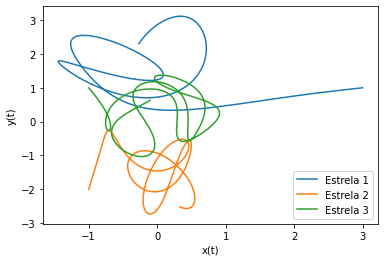

In [0]:
ra = array([ 3., 1.,.0,.0,
            -1.,-2.,.0,.0,
            -1., 1.,.0,.0 ],float)
r = ra
t = a
h_atual = h

x1_lista, y1_lista = [], []
x2_lista, y2_lista = [], []
x3_lista, y3_lista = [], [] 

while t<=b:
    x1_lista.append(r[0])
    y1_lista.append(r[1])
    x2_lista.append(r[4])
    y2_lista.append(r[5])
    x3_lista.append(r[8])
    y3_lista.append(r[9])
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x1_lista, y1_lista, label=f'Estrela 1')
plt.plot(x2_lista, y2_lista, label=f'Estrela 2')
plt.plot(x3_lista, y3_lista, label=f'Estrela 3')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='lower right')
plt.show()